In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data processing

In [2]:
# Loading the dataset
df = pd.read_csv('/content/gld_price_data.csv')

In [3]:
df.shape

(2290, 6)

In [4]:
df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
df.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
# Checking for any missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Correlation

In [23]:
df.dtypes
df['Date'] = pd.to_datetime(df['Date'], format = 'mixed')

In [24]:
correlation = df.corr()

<Axes: >

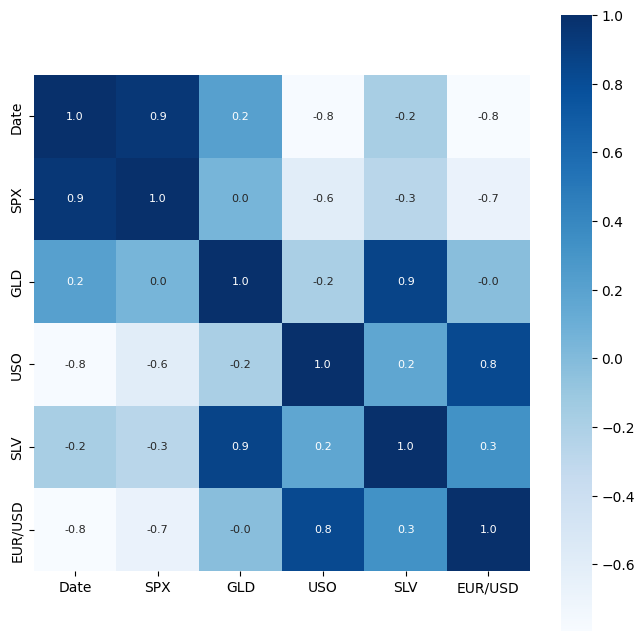

In [25]:
# Constructing heatmap to understand Correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')

In [26]:
# Correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [27]:
df['GLD'].value_counts()

GLD
115.940002    5
117.959999    4
122.209999    4
126.300003    4
124.589996    4
             ..
147.179993    1
146.240005    1
145.729996    1
148.339996    1
122.543800    1
Name: count, Length: 1930, dtype: int64

<ipython-input-28-fa84a3146bc4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

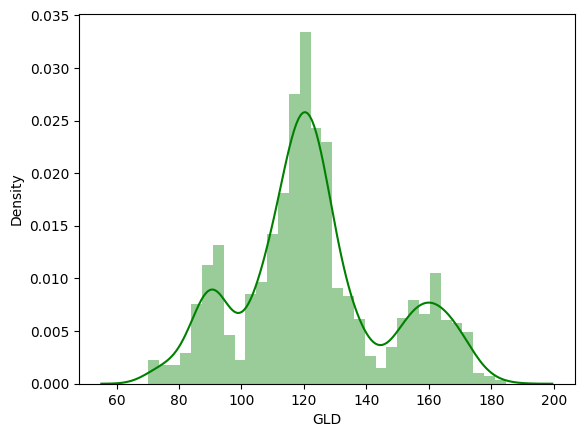

In [28]:
sns.distplot(df['GLD'], color = 'green')

Splitting the Features and Target

In [29]:
x = df.drop(columns = ['Date', 'GLD'], axis = 1)
y = df['GLD']

In [30]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [31]:
# Splitting in Training and Testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [32]:
print(x.shape, x_train.shape, y.shape, y_train.shape)

(2290, 4) (1832, 4) (2290,) (1832,)


Training the model

In [33]:
regressor = RandomForestRegressor(n_estimators = 100)

In [34]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

Model Evaluation

In [35]:
# Prediction on test data
test_data_pred = regressor.predict(x_test)

In [36]:
print(test_data_pred)

[118.87799935 125.97410013 127.11220027 134.83989989 167.67449835
 124.66110082 110.3362993  113.69810025  87.93390019 102.2539988
 125.46450271 114.17850071 116.91919969 112.05099958 122.63389901
 106.75169871 132.13000294 112.15570103 170.81869966 113.82550074
 134.03499718 125.68760001 118.73453903 131.32699994 126.39450088
  87.97390024 124.89780189 124.68549907 124.76399921 117.40900034
 130.12410067 145.21519936 123.88500044 119.97259857 148.06760276
 159.30060208 109.97080058 113.79220097 120.23479915 113.7872004
 141.41249798 126.06040077 122.26269974 126.12039993  73.28040126
 125.8343999  102.60720002 125.80940097  77.83410064 102.24909945
 119.58620116 162.03910241 155.28500076 112.31110148 118.79620054
 119.37959909 114.14969973 113.14589943  81.84310081 171.15749734
 127.52050144 152.16590151 117.6095005  164.62869813  99.13710017
 114.59780025 135.32019784 131.45530188 124.69079989  98.48299996
 127.87859997 117.44190096 109.67159909 120.92760042 118.40519766
 137.3889010

In [37]:
# Using R squared Error
err_score = metrics.r2_score(y_test, test_data_pred)
print("Accuracy : ", err_score)

Accuracy :  0.9805545177711088


Compare the actual values and predicted values

In [38]:
y_test = list(y_test)

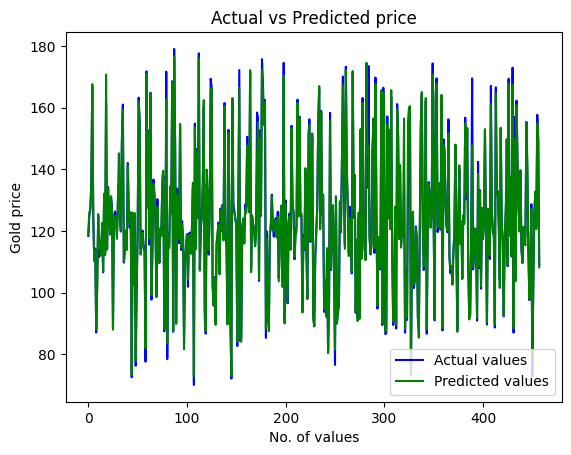

In [39]:
plt.plot(y_test, color = 'blue', label = 'Actual values')
plt.plot(test_data_pred, color = 'green', label = 'Predicted values')
plt.title('Actual vs Predicted price')
plt.xlabel('No. of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()

As the values are very close to each other, and since all values are not in range of 1 to 20, so, we can say that the R square Error will be valid

Thank You